# Our database with companies that left Russia in 2022

### База Тиграна с Action, Tone + База старая с INT  + Spark

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kmodes.kprototypes import KPrototypes

In [2]:
df_int = pd.read_excel('../data/major_version_int.xlsx')

df_actions_tone = pd.read_csv('../data/major_version_act.csv')

spark = pd.read_csv('../data/spark_interfax.csv', delimiter=';')


In [3]:
df_int.shape

(4007, 5)

In [4]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_int.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 i              0
Action        27
Industry     420
Country      180
ИНН         3095
dtype: int64


In [5]:
df_actions_tone.shape

(3344, 6)

In [6]:
df_actions_tone = df_actions_tone.drop('Unnamed: 0', axis = 1)
df_actions_tone = df_actions_tone.rename(columns = {'tone': 'Tone'})
df_actions_tone = df_actions_tone.sort_values(by='Company')
df_actions_tone = df_actions_tone.reset_index(drop=True)
df_actions_tone.head(1)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2


In [7]:
# Define a dictionary to map the numbers to their corresponding labels
label_mapping = {0: 'leaved', 1: 'continue', 2: 'paused'}

# Replace the numbers in the specified column with the labels
df_actions_tone['Tone'] = df_actions_tone['Tone'].map(label_mapping)

In [8]:
df_actions_tone.head(10)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,leaved
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,leaved
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue
5,3M Company,"['suspend', 'new', 'investments', 'and', 'new'...",Health Care,Switzerland,paused
6,A&D,"['cease', 'trading', 'operations', 'with', 'ru...",Industrials,Germany,leaved
7,A-SAFE,"['still', 'operating', 'in', 'russia', ';', 's...",Information Technology,Australia,leaved
8,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,leaved
9,AB InBev,"['continues', 'flows', 'to', 'russian', 'and',...",Industrials,France,leaved


In [9]:
df_int = df_int.rename(columns={'i': 'Company'})
df_int = df_int.rename(columns={'ИНН': 'INT'})
df_int = df_int.sort_values(by='Company')
df_int = df_int.reset_index(drop=True)
df_int.head(1)

,Company,Action,Industry,Country,INT
0,1840 & Company,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873


In [10]:
df1 = df_actions_tone.copy()
df2 = df_int.copy()

# Merge the two datasets based on the "Company" column
data = pd.merge(df1, df2, on='Company')
data.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,Action_y,Industry_y,Country_y,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873


In [11]:
# Select the desired columns
desired_columns = ['Company', 'Action_x', 'Industry_x', 'Country_x', 'Tone', 'INT']
data = data[desired_columns]
data.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,7743855873


In [12]:
# Rename the columns
data.columns = ['Company', 'Action', 'Industry', 'Country', 'Tone', 'INT']

In [13]:
data

,Company,Action,Industry,Country,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,7743855873
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused,7704662187
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,leaved,NaN
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,leaved,3528103017
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue,9704116463
...,...,...,...,...,...,...
3339,"Французский автомобильный концерн Re...""","['no', 'new', 'investments']",Utilities,France,leaved,5003026630
3340,Хостинг Ukraine,"['ban', 'people', 'with', 'ties', 'to', 'russi...",NGO,Germany,leaved,7453231464
3341,Шальке,"['no', 'new', 'business']",Industrials,Denmark,leaved,NaN
3342,Эвертон,"['stopped', 'renewing', 'and', 'underwriting',...",Financials,United States,leaved,6829067343


# Spark database

In [14]:
spark.head()

,№,Наименование,Регистрационный номер,Наименование на английском,Краткое наименование,Дата регистрации,"Возраст компании, лет",Код налогоплательщика,Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1,"3М ВОЛГА, ООО",1.121674e+12,"3M VOLGA, OOO","ООО""3М ВОЛГА""",16.08.2012,"10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,2,"CCC, ООО",1.198617e+12,"OOO C, CJSC","ООО ""CCC""",18.06.2019,"3,5",8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,65 126 000,47 022 000,NaN,NaN,-381 000,8 130 000,213 000
2,3,"WIX-SZ, ООО",1.133538e+12,"WIX-SZ, OOO","ООО ""WIX-SZ""",12.02.2013,"10,0",3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,...,18 049 000,11 592 000,5 157 000,11 399 000,15 481 000,558 000,548 000,279 000,422 000,543 000
3,4,"А.С. ГРУПП, ООО",1.192375e+12,"A.S. GROUP, LLC","ООО ""А.С. ГРУПП""",16.04.2019,"4,0",2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,...,NaN,NaN,1 586 000,5 833 000,NaN,NaN,NaN,-2 667 000,-914 000,NaN
4,5,"АББ, ООО",1.027739e+12,"ABB, OOO","ООО ""АББ""",13.12.2000,"22,0",7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,...,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000


In [15]:
spark.shape

(796, 28)

<span style="font-size: 17px;"> Delete all unnecessary columns

In [16]:
columns_to_drop = ['№', 'Наименование', 'Регистрационный номер', 'Краткое наименование', 'Дата регистрации']
spark = spark.drop(columns_to_drop, axis=1)

In [17]:
print(spark.columns)

Index(['Наименование на английском', 'Возраст компании, лет',
       'Код налогоплательщика', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', '2017, Среднесписочная численность работников',
       '2018, Среднесписочная численность работников',
       '2019, Среднесписочная численность работников',
       '2020, Среднесписочная численность работников',
       '2021, Среднесписочная численность работников', 'Мои списки',
       '2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB',
       '2020, Выручка, RUB', '2021, Выручка, RUB',
       '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB'],
      dtype='object')


<span style="font-size: 17px;"> Rename columns 'Наименование на английском' and 'Код налогоплательщика' to 'Company' and 'INT'

In [18]:
spark = spark.rename(columns={"Наименование на английском": "Company"})
spark = spark.rename(columns={"Код налогоплательщика": "INT"})
# spark['Company'] = spark['Company'].str.lower()

In [19]:
spark.head(1)

,Company,"Возраст компании, лет",INT,Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников",...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO","10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000


# Merging two databases into one

In [20]:
df_merged = data.merge(spark, on='INT')

In [21]:
df_merged.head()

,Company_x,Action,Industry,Country,Tone,INT,Company_y,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused,7743855873,"EBBVI, OOO","10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
1,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,leaved,3528103017,"ALS, AO","17,5",Производство промышленных газов,Непубличные акционерные общества,...,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
2,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue,9704116463,"AIRBUS, LLC","1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,leaved,7714391842,"FUDZHIFILM RUS, OOO","29,0",Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,...,3 178 782 000,3 672 729 000,2 898 280 000,2 800 149 000,3 410 160 000,117 504 000,49 294 000,188 041 000,265 433 000,446 284 000
4,ABC,"['no', 'new', 'business', 'in', 'russia']",Consumer Discretionary,Austria,leaved,9715417769,"HERZ GROUP RUS, LLC","0,5",Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_merged = df_merged.rename(columns={"Company_y": "Company"})

df_merged = df_merged.drop({'Company_x', 'INT', 
                          '2017, Среднесписочная численность работников', 
                          '2018, Среднесписочная численность работников', 
                          '2019, Среднесписочная численность работников',
                          '2020, Среднесписочная численность работников', 
                          '2021, Среднесписочная численность работников',
                          'Мои списки'}, axis=1)

In [23]:
df_merged = df_merged[['Company', 'Industry', 'Country', 'Action', 'Tone', 'Возраст компании, лет',
       'Вид деятельности/отрасль', 'Организационно-правовая форма',
       'Форма собственности', 'Размер компании', '2017, Выручка, RUB',
       '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
       '2021, Выручка, RUB', '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB']]

In [24]:
df_merged.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",paused,"10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,"17,5",Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,"1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",leaved,"29,0",Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3 178 782 000,3 672 729 000,2 898 280 000,2 800 149 000,3 410 160 000,117 504 000,49 294 000,188 041 000,265 433 000,446 284 000
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",leaved,"0,5",Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
database = df_merged.copy()

<span style="font-size: 17px;"> The column 'Возраст компании, лет' is of string datatype. To make it float datatype, we replace , with . 

In [26]:
if database['Возраст компании, лет'].dtype == object:
        # Replace commas with periods in the column
        database['Возраст компании, лет'] = database['Возраст компании, лет'].str.replace(',', '.')
database['Возраст компании, лет'] = database['Возраст компании, лет'].astype(float)

<span style="font-size: 17px;"> Some columns has big number with spaces, therefore they are of a string type.  To make them float datatype, we delete all unnecassary spaces

In [27]:
database['2017, Выручка, RUB'] = database['2017, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2018, Выручка, RUB'] = database['2018, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2019, Выручка, RUB'] = database['2019, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2020, Выручка, RUB'] = database['2020, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2021, Выручка, RUB'] = database['2021, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2017, Прибыль (убыток) до налогообложения , RUB'] = database['2017, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2018, Прибыль (убыток) до налогообложения , RUB'] = database['2018, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2019, Прибыль (убыток) до налогообложения , RUB'] = database['2019, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2020, Прибыль (убыток) до налогообложения , RUB'] = database['2020, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2021, Прибыль (убыток) до налогообложения , RUB'] = database['2021, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)

In [28]:
database.head(5)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,1.0,Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",leaved,0.5,Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
database.shape

(476, 20)

In [30]:
database['Country'] = database['Country'].replace('United States', 'USA')

In [31]:
database['Industry'] = database['Industry'].replace('Information Technology', 'IT')

In [32]:
count = len(database[database['Industry'] == 'Information technology'])
count

0

# Handling missing values

<span style="font-size: 17px;"> Count total NaN at each column in a database

In [33]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                              0
Industry                                             0
Country                                              0
Action                                               0
Tone                                                 0
Возраст компании, лет                                0
Вид деятельности/отрасль                             0
Организационно-правовая форма                        0
Форма собственности                                  0
Размер компании                                     77
2017, Выручка, RUB                                 123
2018, Выручка, RUB                                 111
2019, Выручка, RUB                                 104
2020, Выручка, RUB                                 100
2021, Выручка, RUB                                 106
2017, Прибыль (убыток) до налогообложения , RUB    110
2018, Прибыль (убыток) до налогообложения , RUB    103
2019, Прибыл

<span style="font-size: 17px;"> Visualize missing values in dataset

In [34]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<span style="font-size: 17px;"> Visualize the number of missing values as a bar chart

<Axes: >

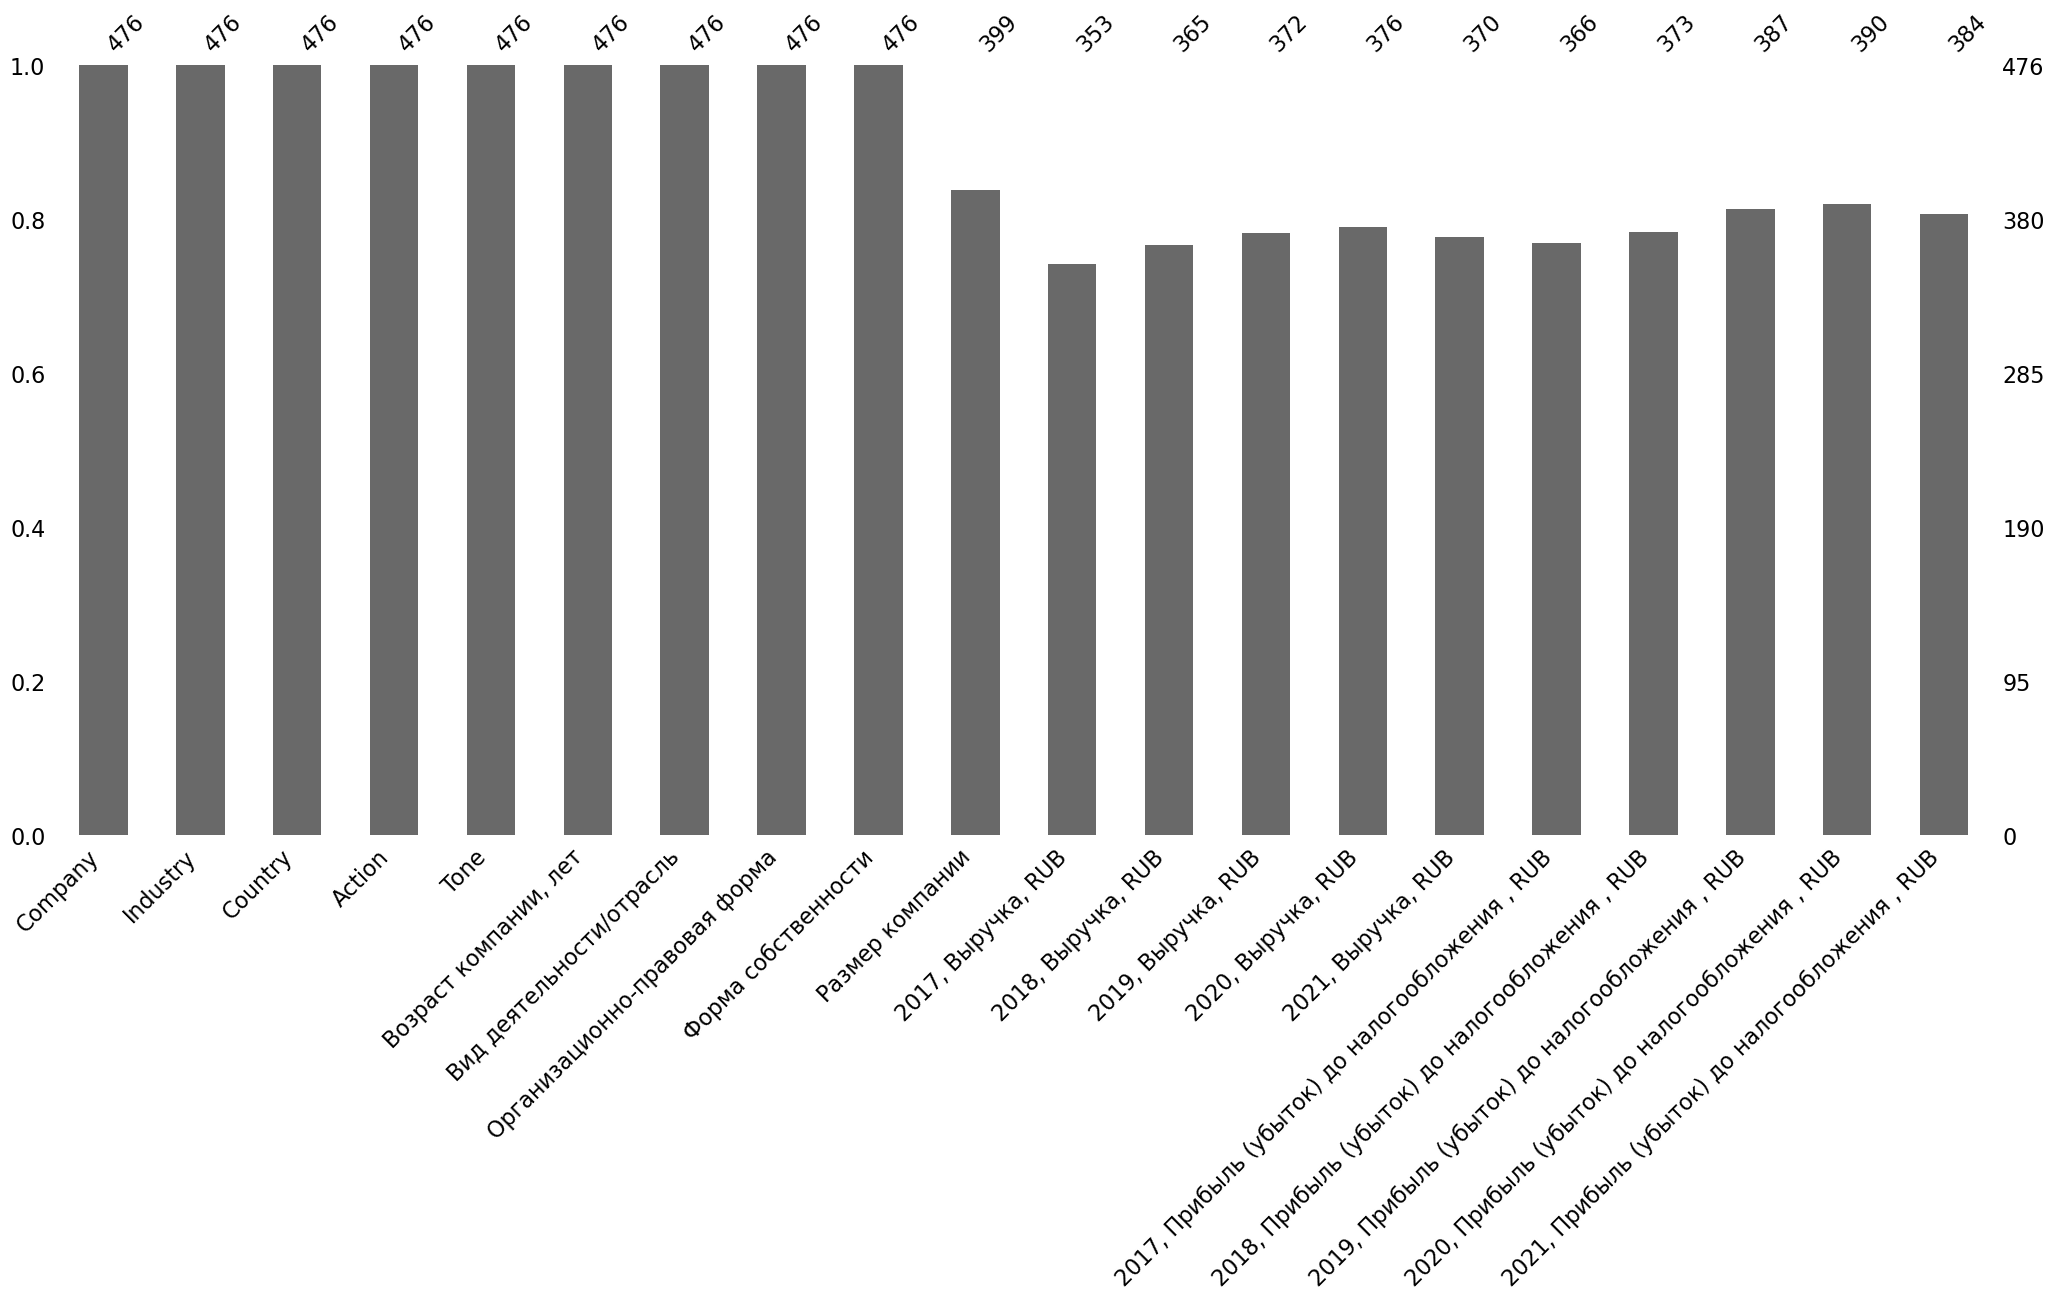

In [35]:
import missingno as msno
msno.bar(database)

<span style="font-size: 17px;"> Visualize the correlation between the number of missing values in different columns as a heatmap.

<span style="font-size: 17px;"> As we see below, there is a diagonal with values 0.9, which means that profit and insome highly correlates in terms of null values (if profit value is present, then income value is likely to be present too)

<Axes: >

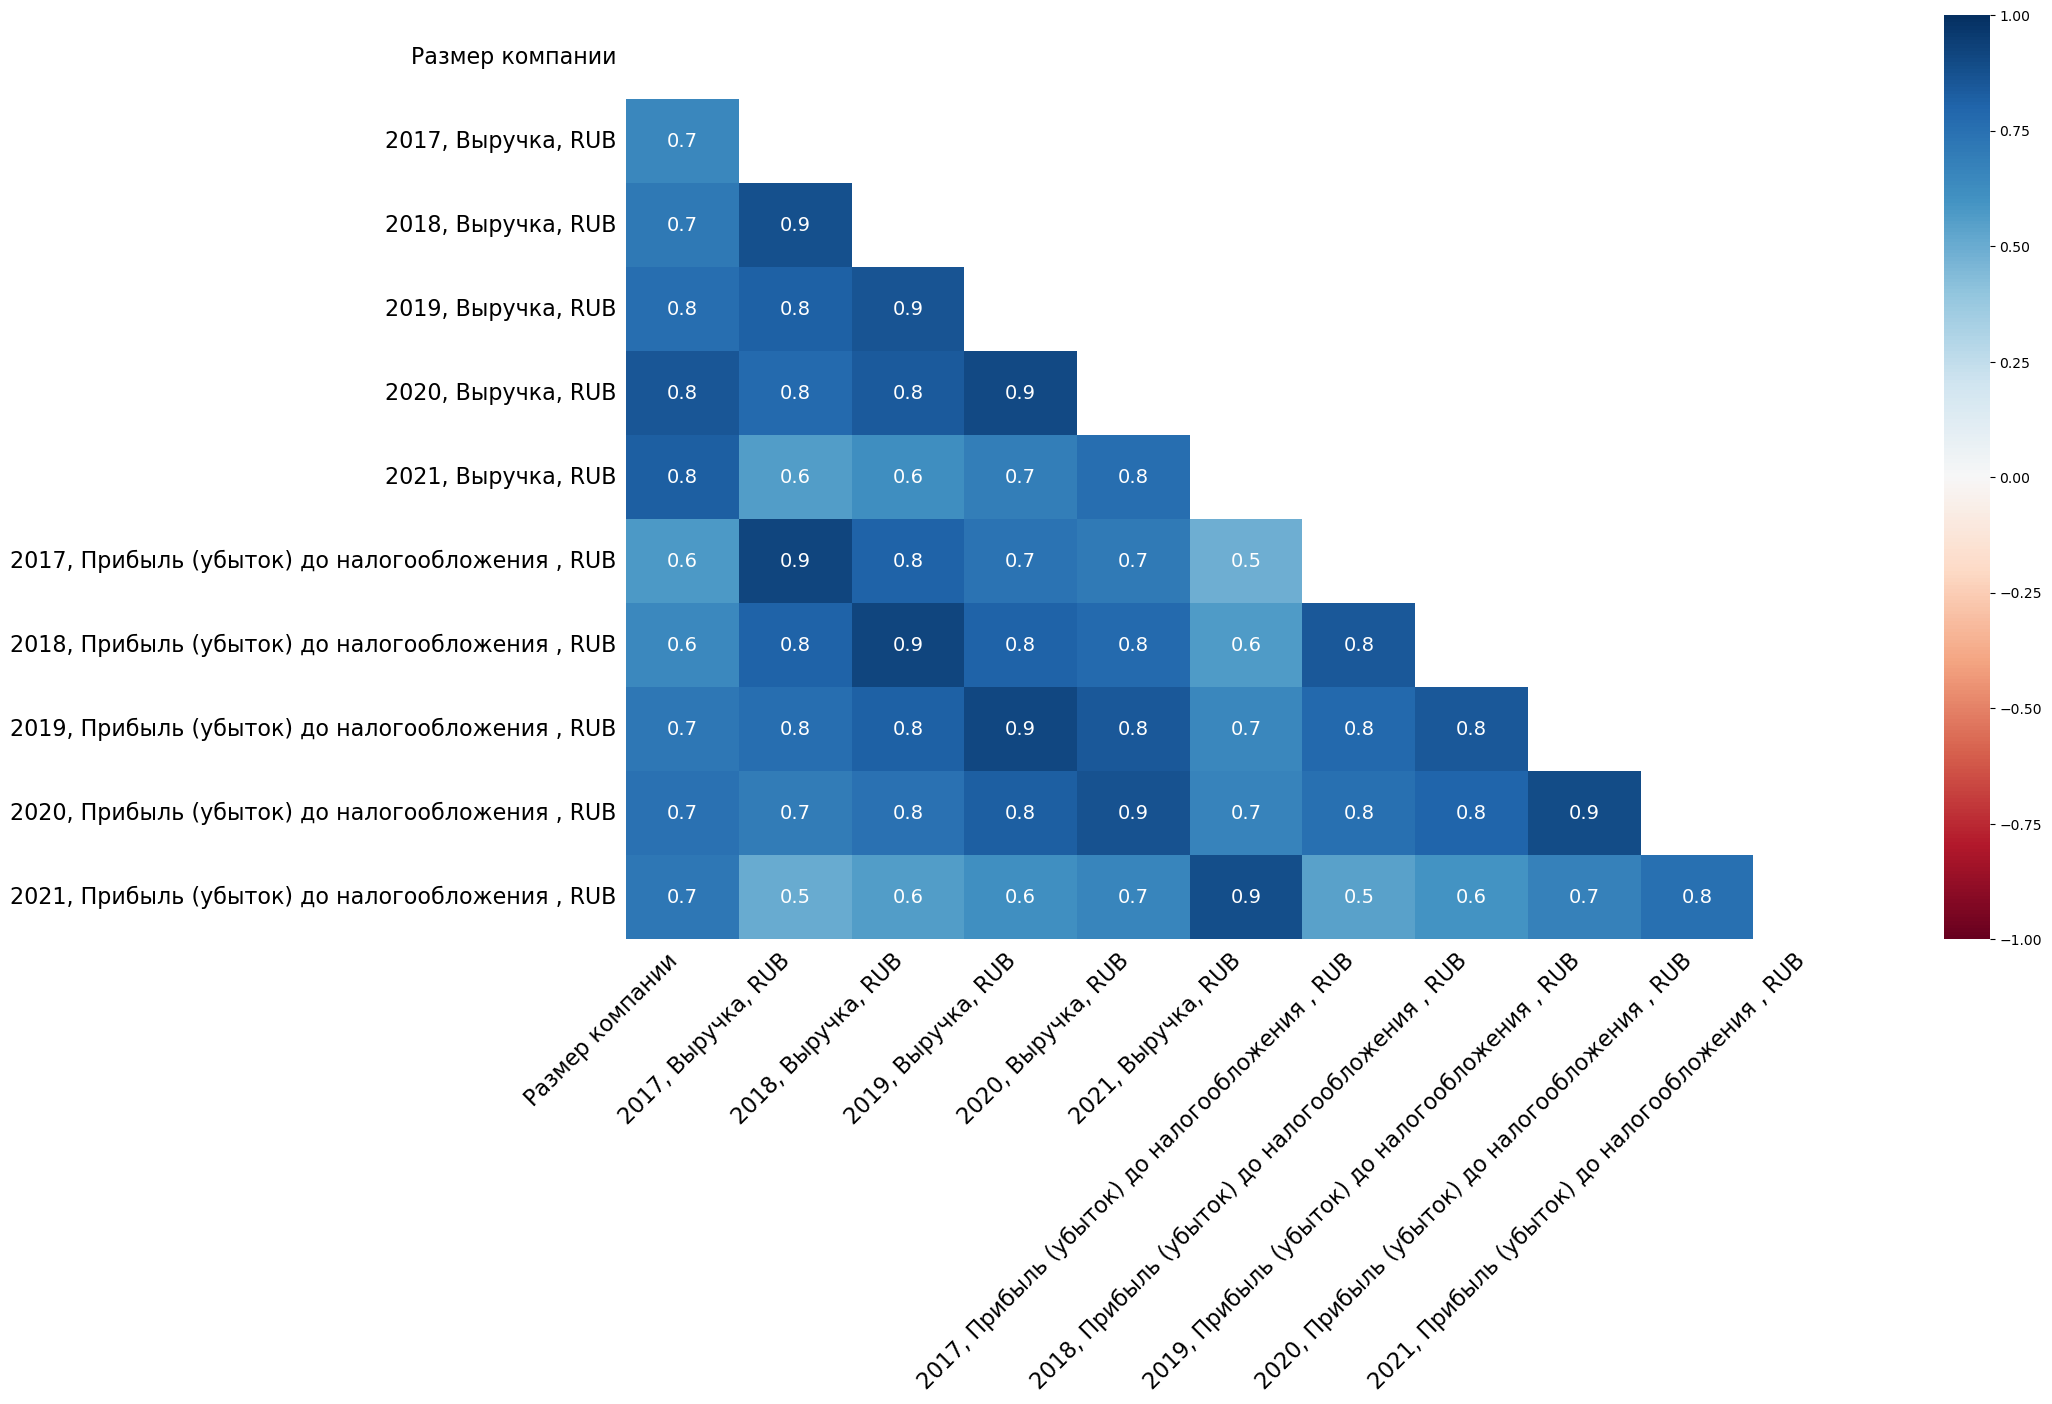

In [36]:
msno.heatmap(database)

# Here we have to fill NaN values of proft with mean !!!!!

<span style="font-size: 17px;"> Delete all rows where more than 6 NaN values exist

In [37]:
# database.dropna(thresh=database.shape[1] - 6, inplace=True)

In [38]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                              0
Industry                                             0
Country                                              0
Action                                               0
Tone                                                 0
Возраст компании, лет                                0
Вид деятельности/отрасль                             0
Организационно-правовая форма                        0
Форма собственности                                  0
Размер компании                                     77
2017, Выручка, RUB                                 123
2018, Выручка, RUB                                 111
2019, Выручка, RUB                                 104
2020, Выручка, RUB                                 100
2021, Выручка, RUB                                 106
2017, Прибыль (убыток) до налогообложения , RUB    110
2018, Прибыль (убыток) до налогообложения , RUB    103
2019, Прибыл

In [39]:
database.shape

(476, 20)

In [40]:
database['Mean Revenue'] = database[['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB']].mean(axis=1)

In [41]:
database.dropna(subset=['Mean Revenue'], inplace=True)
database.drop(['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB'], axis=1, inplace=True)


In [42]:
database.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB",Mean Revenue
0,"EBBVI, OOO",Health Care,USA,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08,1.031187e+10
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09,4.148731e+09
3,"FUDZHIFILM RUS, OOO",IT,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08,3.192020e+09
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,8.034900e+07,-7.945400e+07,-1.681290e+08,6.518300e+07,1.402440e+08,2.062124e+09
7,"MERCK LIFE SCIENCE, LLC",Health Care,USA,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.023740e+08,9.124000e+07,5.450100e+07,3.063090e+08,3.462030e+08,1.059165e+09


In [43]:
database.shape

(402, 16)

In [44]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                            0
Country                                             0
Action                                              0
Tone                                                0
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                     8
2017, Прибыль (убыток) до налогообложения , RUB    47
2018, Прибыль (убыток) до налогообложения , RUB    38
2019, Прибыль (убыток) до налогообложения , RUB    23
2020, Прибыль (убыток) до налогообложения , RUB    23
2021, Прибыль (убыток) до налогообложения , RUB    28
Mean Revenue                                        0
dtype: int64


In [45]:
database['Mean Profit'] = database[['2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB', '2019, Прибыль (убыток) до налогообложения , RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2021, Прибыль (убыток) до налогообложения , RUB']].mean(axis=1)

In [46]:
database.dropna(subset=['Mean Revenue'], inplace=True)
database.drop(['2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB', '2019, Прибыль (убыток) до налогообложения , RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2021, Прибыль (убыток) до налогообложения , RUB'], axis=1, inplace=True)

In [47]:
database.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"EBBVI, OOO",Health Care,USA,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09
3,"FUDZHIFILM RUS, OOO",IT,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06
7,"MERCK LIFE SCIENCE, LLC",Health Care,USA,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08


In [48]:
database.shape

(402, 12)

In [49]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                          0
Industry                         0
Country                          0
Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  8
Mean Revenue                     0
Mean Profit                      1
dtype: int64


In [50]:
database.dropna(inplace=True)

In [51]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                          0
Industry                         0
Country                          0
Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  0
Mean Revenue                     0
Mean Profit                      0
dtype: int64


In [52]:
database.shape

(393, 12)

In [53]:
database.describe()

,"Возраст компании, лет",Mean Revenue,Mean Profit
count,393.000000,3.930000e+02,3.930000e+02
mean,16.386768,1.588381e+10,1.157421e+09
std,7.411762,5.708728e+10,4.329993e+09
min,1.500000,5.000000e+03,-8.422013e+09
25%,11.000000,1.170690e+08,9.222000e+05
50%,16.500000,1.558419e+09,7.363080e+07
75%,21.000000,7.715130e+09,4.608464e+08
max,46.000000,8.470387e+11,3.872745e+10


In [54]:
database.corr()

/var/folders/pk/czrcbd3n6tx7f3m676x_gw700000gn/T/ipykernel_52301/893794936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  database.corr()


,"Возраст компании, лет",Mean Revenue,Mean Profit
"Возраст компании, лет",1.000000,0.225665,0.200756
Mean Revenue,0.225665,1.000000,0.534594
Mean Profit,0.200756,0.534594,1.000000


<span style="font-size: 17px;">  Now our dataset has no NaN values and we can start clustarisation

In [55]:
database = database[database['Возраст компании, лет'] <= 35]

In [56]:
database.shape

(392, 12)

In [57]:
# Sort the DataFrame by Mean Revenue column in descending order
sort_by_revenue = database.sort_values('Mean Revenue', ascending=False)
sort_by_profit = database.sort_values('Mean Profit', ascending=False)
# Select the top 10 rows with the largest profits

In [58]:
sort_by_revenue.head(10)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
181,"TORGOVY DOM PEREKRESTOK, AO",IT,USA,"['suspend', 'all', 'shipments', 'to', 'russia']",paused,29.0,Торговля розничная преимущественно пищевыми пр...,Непубличные акционерные общества,Частная собственность,Крупные предприятия,8.470387e+11,1.965177e+10
74,"LERUA MERLEN VOSTOK, OOO",Consumer Discretionary,France,"['stopped', 'new', 'investments', ',', 'import...",leaved,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10
419,"AVTOVAZ, AO",Consumer Discretionary,France,"['sell', 'renault', 'russia', ';', 'transfer',...",leaved,30.0,Производство легковых автомобилей,Непубличные акционерные общества,Частная собственность,Крупные предприятия,2.751390e+11,-1.395554e+09
148,"EPPL RUS, OOO",IT,USA,"['suspend', 'all', 'official', 'site', 'sales'...",paused,11.0,"Торговля оптовая компьютерами, периферийными у...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.381601e+11,8.266895e+09
293,"SERK, OOO",IT,South Korea,"['suspend', 'all', 'shipments', 'to', 'russia']",paused,16.5,Торговля оптовая бытовыми электротоварами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.367960e+11,7.554737e+09
53,"METRO KESH END KERRI, OOO",Consumer Staples,Germany,"['stop', 'all', 'growth', 'investments', 'and'...",leaved,22.0,Торговля розничная преимущественно пищевыми пр...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.204530e+11,1.102893e+10
267,"MERSEDES-BENTS RUS, AO",Consumer Discretionary,Germany,"['suspend', 'all', 'shipments', 'to', 'russia']",paused,28.5,Торговля автотранспортными средствами,Непубличные акционерные общества,Собственность иностранных юридических лиц,Крупные предприятия,1.984721e+11,4.246639e+09
24,"APATIT, AO",Materials,Norway,"['reduced', 'deliveries', 'and', 'supplies', '...",leaved,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,Крупные предприятия,1.844591e+11,3.731023e+10
23,"APATIT, AO",Industrials,USA,"['stop', 'shipments', 'to', 'russia', ';', 'ma...",leaved,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,Крупные предприятия,1.844591e+11,3.731023e+10
179,"KAMAZ, PAO",Consumer Discretionary,Germany,"['freeze', 'activities', 'in', 'russia']",leaved,32.5,Производство грузовых автомобилей,Публичные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,1.784821e+11,1.574902e+09


In [59]:
sort_by_profit.head(10)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
20,"ACHIMGAZ, AO",Energy,Germany,"['maintain', 'russian', 'natural', 'gas', 'pro...",leaved,17.0,Предоставление прочих услуг в области добычи н...,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,6.617841e+10,3.872745e+10
24,"APATIT, AO",Materials,Norway,"['reduced', 'deliveries', 'and', 'supplies', '...",leaved,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,Крупные предприятия,1.844591e+11,3.731023e+10
23,"APATIT, AO",Industrials,USA,"['stop', 'shipments', 'to', 'russia', ';', 'ma...",leaved,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,Крупные предприятия,1.844591e+11,3.731023e+10
137,"YUNIPRO, PAO",Utilities,Germany,"['suspend', 'new', 'russian', 'gas', 'purchase...",paused,18.0,Производство электроэнергии тепловыми электрос...,Публичные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,8.392181e+10,2.447115e+10
122,"FILIP MORRIS IZHORA, AO",Consumer Staples,USA,"['explore', 'strategic', 'alternatives', ',', ...",leaved,26.5,Производство табачных изделий,Непубличные акционерные общества,Собственность иностранных юридических лиц,Крупные предприятия,1.071844e+11,2.364943e+10
380,"FORTUM, PAO",Utilities,Finland,"['exit', 'russian', 'market']",leaved,17.5,Производство электроэнергии,Публичные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,7.538546e+10,1.970527e+10
181,"TORGOVY DOM PEREKRESTOK, AO",IT,USA,"['suspend', 'all', 'shipments', 'to', 'russia']",paused,29.0,Торговля розничная преимущественно пищевыми пр...,Непубличные акционерные общества,Частная собственность,Крупные предприятия,8.470387e+11,1.965177e+10
326,"SISTEMA, PAO AFK",Financials,Germany,"['wind', 'down', 'business', 'in', 'russia']",leaved,29.5,Вложения в ценные бумаги и деятельность дилерская,Публичные акционерные общества,Частная собственность,Крупные предприятия,2.978876e+10,1.644489e+10
74,"LERUA MERLEN VOSTOK, OOO",Consumer Discretionary,France,"['stopped', 'new', 'investments', ',', 'import...",leaved,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10
361,"PIVOVARENNAYA KOMPANIYA BALTIKA, OOO",Consumer Staples,Denmark,"['exit', 'russia', 'completely']",leaved,9.0,Производство пива,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,Крупные предприятия,7.740673e+10,1.247502e+10


In [60]:
database = database[database['Mean Revenue'] < 7.808882e+11]
database = database[database['Mean Profit'] < 2.663605e+11]

In [61]:
sorted_df3 = database.sort_values('Mean Revenue', ascending=False)
sorted_df3.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
74,"LERUA MERLEN VOSTOK, OOO",Consumer Discretionary,France,"['stopped', 'new', 'investments', ',', 'import...",leaved,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10
419,"AVTOVAZ, AO",Consumer Discretionary,France,"['sell', 'renault', 'russia', ';', 'transfer',...",leaved,30.0,Производство легковых автомобилей,Непубличные акционерные общества,Частная собственность,Крупные предприятия,2.751390e+11,-1.395554e+09
148,"EPPL RUS, OOO",IT,USA,"['suspend', 'all', 'official', 'site', 'sales'...",paused,11.0,"Торговля оптовая компьютерами, периферийными у...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.381601e+11,8.266895e+09
293,"SERK, OOO",IT,South Korea,"['suspend', 'all', 'shipments', 'to', 'russia']",paused,16.5,Торговля оптовая бытовыми электротоварами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.367960e+11,7.554737e+09
53,"METRO KESH END KERRI, OOO",Consumer Staples,Germany,"['stop', 'all', 'growth', 'investments', 'and'...",leaved,22.0,Торговля розничная преимущественно пищевыми пр...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.204530e+11,1.102893e+10


In [62]:
database.to_pickle(f'../data/pickles/int_spark_no_nans.pkl')

# Clusterisation (k-prototypes)

Если мы оставляем колонку 'Mean Profit', то получается 1 кластер

Если мы удаляем колонку 'Mean Revenue' and 'Mean Profit', то получается 2 кластера: 
0 : 326 и 1 : 218

In [63]:
database2 = database.copy()
database2 = database2.drop({'Company', 'Action', 'Вид деятельности/отрасль','Организационно-правовая форма'} , axis = 1)
# database2 = database2.drop({'Company', 'Action','Вид деятельности/отрасль', 'Организационно-правовая форма','Форма собственности'} , axis = 1)

In [64]:
database2.head(5)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,Health Care,USA,paused,10.5,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08
1,Materials,France,leaved,17.5,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09
3,IT,Japan,leaved,29.0,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08
6,Industrials,France,paused,12.5,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06
7,Health Care,USA,leaved,17.5,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08


In [65]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [66]:
mark_array=database2.values

<span style="font-size: 17px;"> Mark columns that has float datatypes

In [67]:
mark_array[:, 3] = mark_array[:, 3].astype(float)
mark_array[:, 6] = mark_array[:, 6].astype(float)
mark_array[:, 7] = mark_array[:, 7].astype(float)

In [68]:
mark_array

array([['Health Care', 'USA', 'paused', ..., 'Крупные предприятия',
        10311872600.0, 197262600.0],
       ['Materials', 'France', 'leaved', ..., 'Крупные предприятия',
        4148730600.0, 1990225400.0],
       ['IT', 'Japan', 'leaved', ..., 'Крупные предприятия',
        3192020000.0, 213311200.0],
       ...,
       ['Health Care', 'USA', 'paused', ..., 'Крупные предприятия',
        8150361200.0, 255994800.0],
       ['Utilities', 'France', 'leaved', ..., 'Микропредприятия',
        4831200.0, -8494600.0],
       ['Financials', 'USA', 'leaved', ..., 'Микропредприятия',
        5840200.0, 2420400.0]], dtype=object)

<span style="font-size: 17px;"> Get the position of categorical columns

In [69]:
catColumnsPos = [database2.columns.get_loc(col) for col in list(database2.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(database2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Industry', 'Country', 'Tone', 'Форма собственности', 'Размер компании']
Categorical columns position  : [0, 1, 2, 4, 5]


In [70]:
# Convert dataframe to matrix
dfMatrix = database2.to_numpy()

In [71]:
dfMatrix 

array([['Health Care', 'USA', 'paused', ..., 'Крупные предприятия',
        10311872600.0, 197262600.0],
       ['Materials', 'France', 'leaved', ..., 'Крупные предприятия',
        4148730600.0, 1990225400.0],
       ['IT', 'Japan', 'leaved', ..., 'Крупные предприятия',
        3192020000.0, 213311200.0],
       ...,
       ['Health Care', 'USA', 'paused', ..., 'Крупные предприятия',
        8150361200.0, 255994800.0],
       ['Utilities', 'France', 'leaved', ..., 'Микропредприятия',
        4831200.0, -8494600.0],
       ['Financials', 'USA', 'leaved', ..., 'Микропредприятия',
        5840200.0, 2420400.0]], dtype=object)

In [72]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database2.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Industry                 0
Country                  0
Tone                     0
Возраст компании, лет    0
Форма собственности      0
Размер компании          0
Mean Revenue             0
Mean Profit              0
dtype: int64


<span style="font-size: 17px;"> Elbow method to detect number of clusters K

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7


<function matplotlib.pyplot.show(close=None, block=None)>

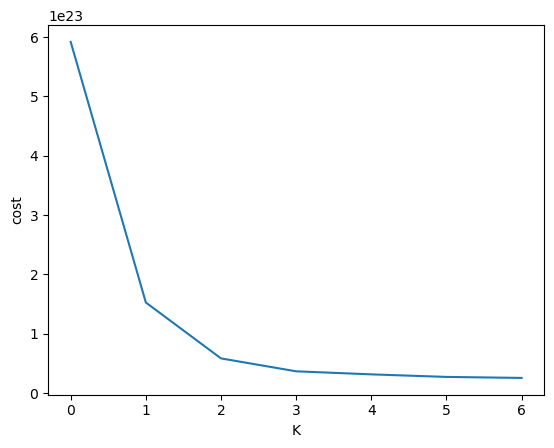

In [73]:
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(database2, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [74]:
cost

[5.9174748902498196e+23,
 1.5266682254240467e+23,
 5.848156133757315e+22,
 3.6731585577245892e+22,
 3.1604584380327514e+22,
 2.7288467836041263e+22,
 2.5604916574882147e+22]

In [75]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=30)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 2, 4, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 4, ncost: 1.5382710907848784e+23
Run: 1, iteration: 2/30, moves: 1, ncost: 1.5309032254273847e+23
Run: 1, iteration: 3/30, moves: 1, ncost: 1.5266682254240467e+23
Run: 1, iteration: 4/30, moves: 0, ncost: 1.5266682254240467e+23
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/30, moves: 4, ncost: 1.564966059645386e+23
Run: 2, iteration: 2/30, moves: 3, ncost: 1.5309032254273847e+23
Run: 2, iteration: 3/30, moves: 1, ncost: 1.5266682254240467e+23
Run: 2, iteration: 4/30, moves: 0, ncost: 1.5266682254240467e+23
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/30, moves: 48, ncost: 1.728236

In [76]:
print(kproto.cluster_centroids_)

[['15.993315508021391' '6666030059.224599' '699998730.7486631'
  'Industrials' 'USA' 'leaved'
  'Собственность иностранных юридических лиц' 'Крупные предприятия']
 ['22.558823529411764' '170714871541.17648' '10200766311.764706'
  'Consumer Discretionary' 'USA' 'leaved'
  'Собственность иностранных юридических лиц' 'Крупные предприятия']]


In [77]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [78]:
cluster_dict

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
database2['cluster']=cluster_dict

In [80]:
for i in range(0,5):
    print(i, ": ", database2[database2['cluster']== i].value_counts().sum())

0 :  374
1 :  17
2 :  0
3 :  0
4 :  0


In [81]:
database2

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster
0,Health Care,USA,paused,10.5,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08,0
1,Materials,France,leaved,17.5,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09,0
3,IT,Japan,leaved,29.0,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08,0
6,Industrials,France,paused,12.5,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06,0
7,Health Care,USA,leaved,17.5,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08,0
...,...,...,...,...,...,...,...,...,...
470,Consumer Staples,Germany,continue,25.0,Собственность иностранных юридических лиц,Крупные предприятия,1.190126e+10,7.338920e+08,0
471,Consumer Staples,Germany,leaved,15.5,Совместная частная и иностранная собственность,Средние предприятия,1.151765e+09,8.579400e+06,0
472,Health Care,USA,paused,24.5,Собственность иностранных юридических лиц,Крупные предприятия,8.150361e+09,2.559948e+08,0
473,Utilities,France,leaved,24.5,Совместная частная и иностранная собственность,Микропредприятия,4.831200e+06,-8.494600e+06,0


In [82]:
database2[database2['cluster']== 0].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster
0,Health Care,USA,paused,10.5,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08,0
1,Materials,France,leaved,17.5,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09,0
3,IT,Japan,leaved,29.0,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08,0
6,Industrials,France,paused,12.5,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06,0
7,Health Care,USA,leaved,17.5,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08,0
8,Health Care,Switzerland,leaved,16.0,Собственность иностранных юридических лиц,Крупные предприятия,2.795885e+10,3.509346e+08,0
9,Energy,Austria,leaved,26.5,Частная собственность,Микропредприятия,5.540000e+06,2.904000e+05,0
10,Industrials,Germany,leaved,11.5,Иная смешанная российская собственность,Средние предприятия,6.552878e+08,6.531720e+07,0
11,Health Care,France,continue,28.0,Собственность иностранных юридических лиц,Крупные предприятия,5.275494e+10,1.595467e+09,0
12,Industrials,Belgium,leaved,14.0,Собственность иностранных юридических лиц,Малые предприятия,1.691658e+08,-1.667000e+06,0


In [83]:
database2[database2['cluster']== 1].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster
23,Industrials,USA,leaved,30.5,Частная собственность,Крупные предприятия,1.844591e+11,3.731023e+10,1
24,Materials,Norway,leaved,30.5,Частная собственность,Крупные предприятия,1.844591e+11,3.731023e+10,1
44,IT,China,paused,22.5,Собственность иностранных юридических лиц,Крупные предприятия,1.156967e+11,4.624994e+09,1
53,Consumer Staples,Germany,leaved,22.0,Собственность иностранных юридических лиц,Крупные предприятия,2.204530e+11,1.102893e+10,1
74,Consumer Discretionary,France,leaved,19.5,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10,1
108,Financials,USA,leaved,30.0,Совместная частная и иностранная собственность,Крупные предприятия,1.060494e+11,4.392313e+09,1
121,Consumer Staples,USA,paused,21.0,Собственность иностранных юридических лиц,Крупные предприятия,1.266986e+11,6.729129e+09,1
122,Consumer Staples,USA,leaved,26.5,Собственность иностранных юридических лиц,Крупные предприятия,1.071844e+11,2.364943e+10,1
148,IT,USA,paused,11.0,Собственность иностранных юридических лиц,Крупные предприятия,2.381601e+11,8.266895e+09,1
179,Consumer Discretionary,Germany,leaved,32.5,Совместная частная и иностранная собственность,Крупные предприятия,1.784821e+11,1.574902e+09,1


<span style="font-size: 17px;"> Visualisation:

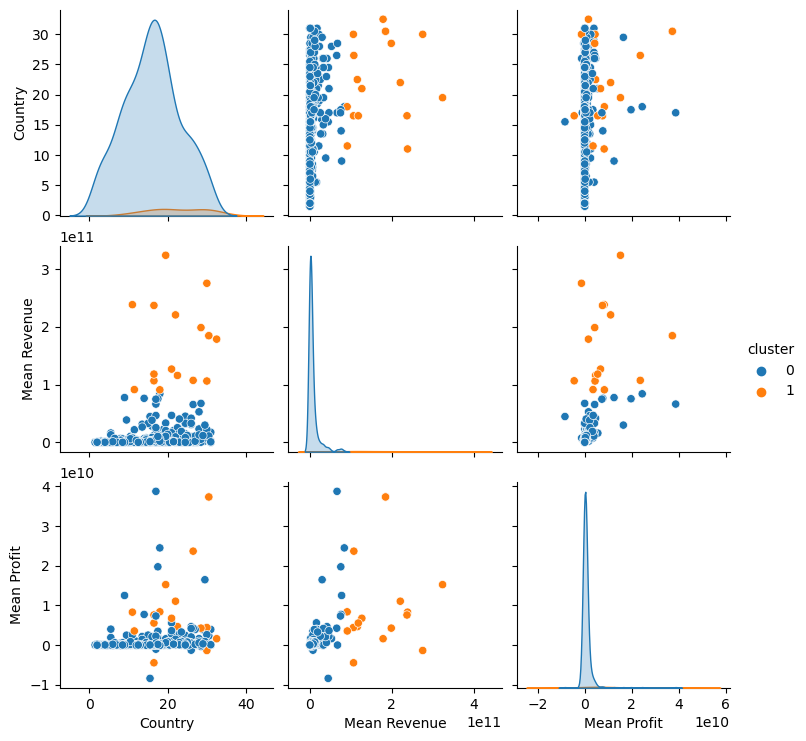

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

database2.columns = ["Tone", "Возраст компании, лет", "Industry", "Country", "Форма собственности", "Размер компании", "Mean Revenue", "Mean Profit", "cluster"]
sns.pairplot(database2, hue="cluster")

## Clusterisation of dataset with income and profit

<span style="font-size: 17px;"> Let's visualize our clusters

In [89]:
# #the volume of each cluster
# df_filtered['Cluster'].value_counts().plot(kind='bar')

# plt.xticks(fontsize=10, rotation=0, ha='right')

# Graphs

In [90]:
import matplotlib.pyplot as plt

In [91]:
database3 = database[database['Tone'] != "continue"]
database3

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"EBBVI, OOO",Health Care,USA,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09
3,"FUDZHIFILM RUS, OOO",IT,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06
7,"MERCK LIFE SCIENCE, LLC",Health Care,USA,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
469,"EKKO-ROS, OOO",Consumer Discretionary,Denmark,"['suspend', 'new', 'investments', 'still', 'op...",paused,29.0,Торговля розничная обувью в специализированных...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.167591e+10,2.783618e+08
471,"EKONIVA-APK KHOLDING, OOO",Consumer Staples,Germany,"['restructuring', 'finances']",leaved,15.5,Деятельность по управлению холдинг-компаниями,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,Средние предприятия,1.151765e+09,8.579400e+06
472,"LILLI FARMA, OOO",Health Care,USA,"['suspend', 'new', 'investments', 'and', 'clin...",paused,24.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,8.150361e+09,2.559948e+08
473,"KATOD, AO",Utilities,France,"['no', 'new', 'investments']",leaved,24.5,Производство прочего электрического оборудования,Непубличные акционерные общества,Совместная частная и иностранная собственность,Микропредприятия,4.831200e+06,-8.494600e+06


### Countries

<span style="font-size: 17px;"> Value_counts() returns the count of unique values in the 'Country' column, and head(10) selects the first 10 values, which represent the top 10 countries with the highest counts.</span>

In [92]:
df_countries = database3['Country'].value_counts().head(10)

In [93]:
df_countries = df_countries.to_frame().reset_index()

In [94]:
df_countries

,index,Country
0,USA,110
1,Germany,51
2,France,22
3,Japan,21
4,United Kingdom,19
5,Netherlands,17
6,Sweden,15
7,Finland,14
8,Switzerland,13
9,Italy,13


<Figure size 1200x800 with 0 Axes>

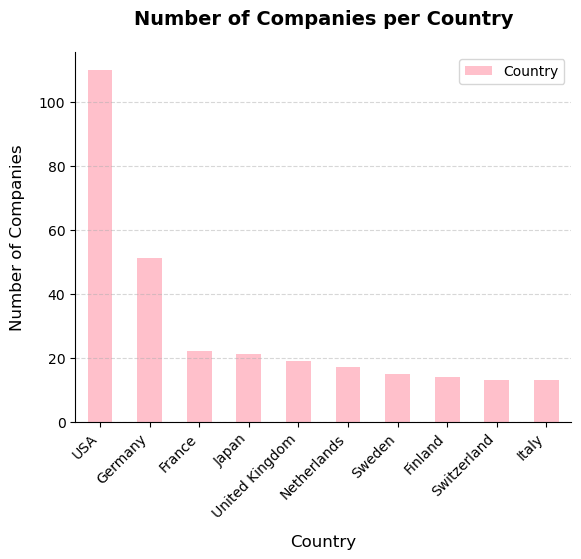

In [95]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_countries.plot(kind='bar', x='index', y='Country', color='pink')

# Set the labels and title
plt.xlabel('Country', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Country', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines (borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Industries:

In [96]:
df_industries = database3['Industry'].value_counts().head(15)
df_industries = df_industries.to_frame().reset_index()

<Figure size 1600x800 with 0 Axes>

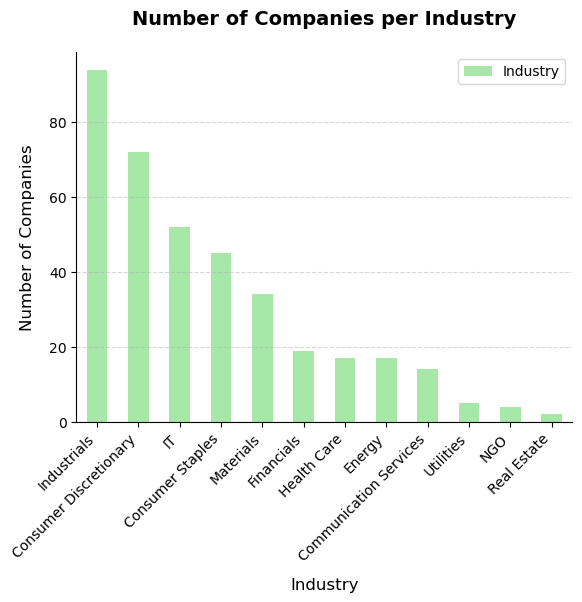

In [97]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust the spacing
plt.figure(figsize=(16, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_industries.plot(kind='bar', x='index', y='Industry', color='#a7e8a9')

# Set the labels and title
plt.xlabel('Industry', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Industry', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Size

In [98]:
df_size = database3['Размер компании'].value_counts()
df_size = df_size.to_frame().reset_index()

<Figure size 1400x800 with 0 Axes>

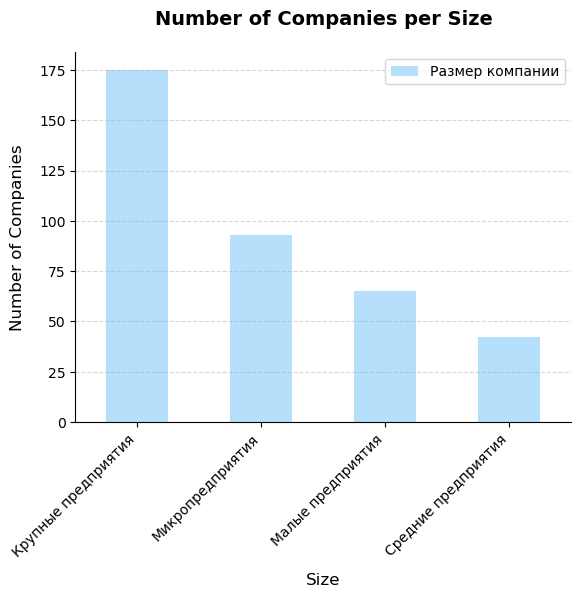

In [99]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust the spacing
plt.figure(figsize=(14, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_size.plot(kind='bar', x='index', y='Размер компании', color='#b6dffc')

# Set the labels and title
plt.xlabel('Size', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Size', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [100]:
database3.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"EBBVI, OOO",Health Care,USA,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09
3,"FUDZHIFILM RUS, OOO",IT,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06
7,"MERCK LIFE SCIENCE, LLC",Health Care,USA,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08


### Age

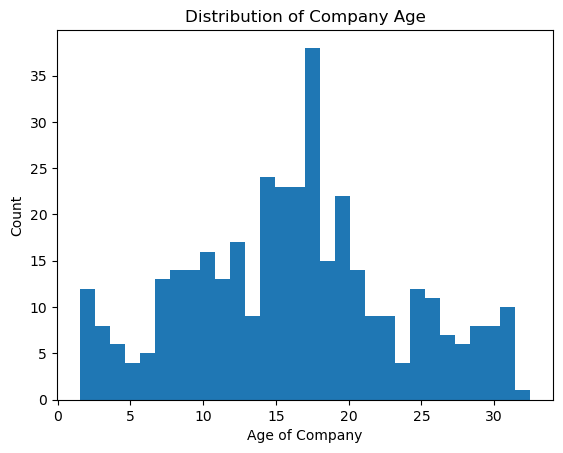

In [101]:
database3['Возраст компании, лет'].plot(kind='hist', bins=30)

plt.xlabel('Age of Company')
plt.ylabel('Count')
plt.title('Distribution of Company Age')

plt.show()

### Organisational form

In [102]:
df_form = database3['Организационно-правовая форма'].value_counts().head(5)
df_form = df_form.to_frame().reset_index()
df_form

,index,Организационно-правовая форма
0,Общества с ограниченной ответственностью,325
1,Непубличные акционерные общества,38
2,Публичные акционерные общества,8
3,Некоммерческие партнерства,1
4,Автономные некоммерческие организации,1


<Figure size 1000x500 with 0 Axes>

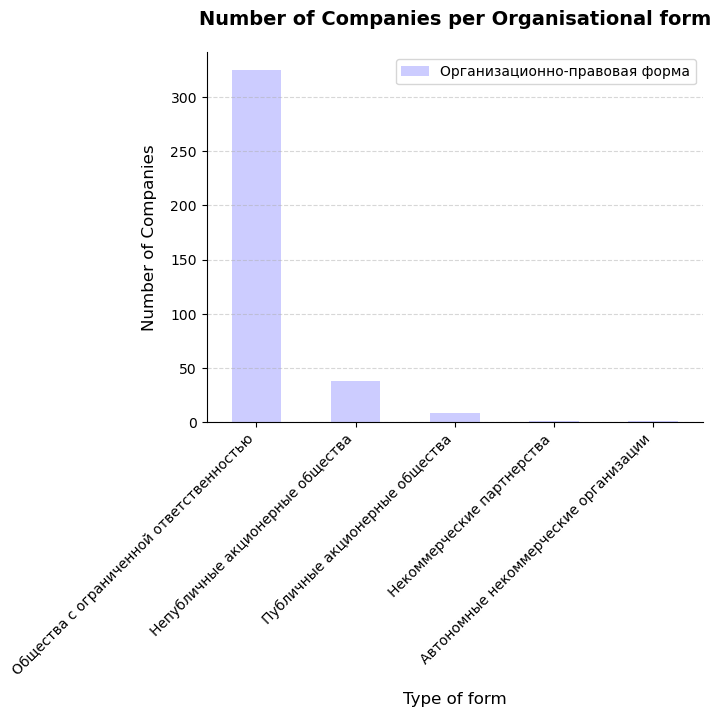

In [103]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_form.plot(kind='bar', x='index', y='Организационно-правовая форма', color='#ccccff')

# Set the labels and title
plt.xlabel('Type of form', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Organisational form', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Form of property

In [142]:
df_form2 = database3['Форма собственности'].value_counts().head(5)
df_form2 = df_form2.to_frame().reset_index()
df_form2 = df_form2.head(3)

<Figure size 640x480 with 0 Axes>

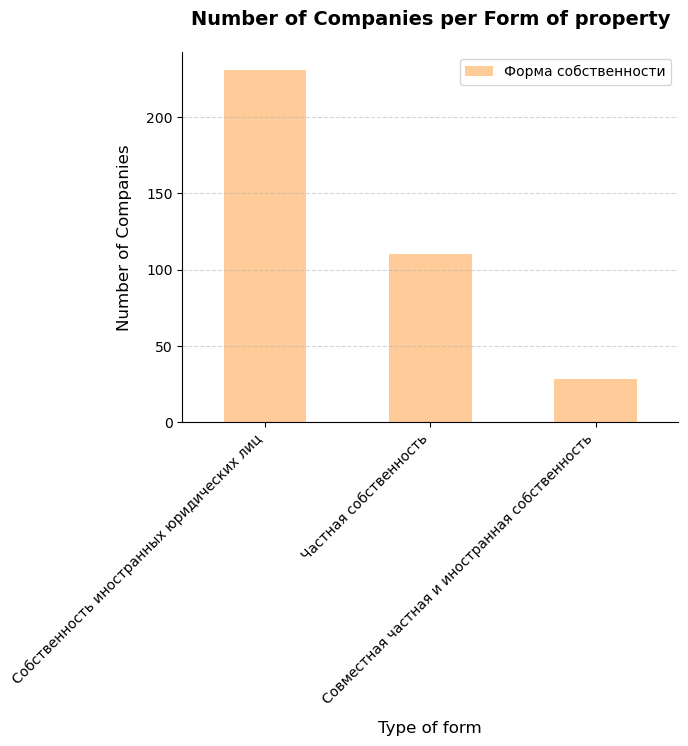

In [143]:
# Increase the figure size and adjust the spacing
#plt.figure(figsize=(3, 2))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_form2.plot(kind='bar', x='index', y='Форма собственности', color='#ffcc99')

# Set the labels and title
plt.xlabel('Type of form', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Form of property', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Tone
* 0 - completely stoped operations in Russia
* 1 - continue operations in Russia
* 2 - paused operations in Russia

In [106]:
df_tone = database3['Tone'].value_counts().head(5)
df_tone

leaved    222
paused    153
Name: Tone, dtype: int64

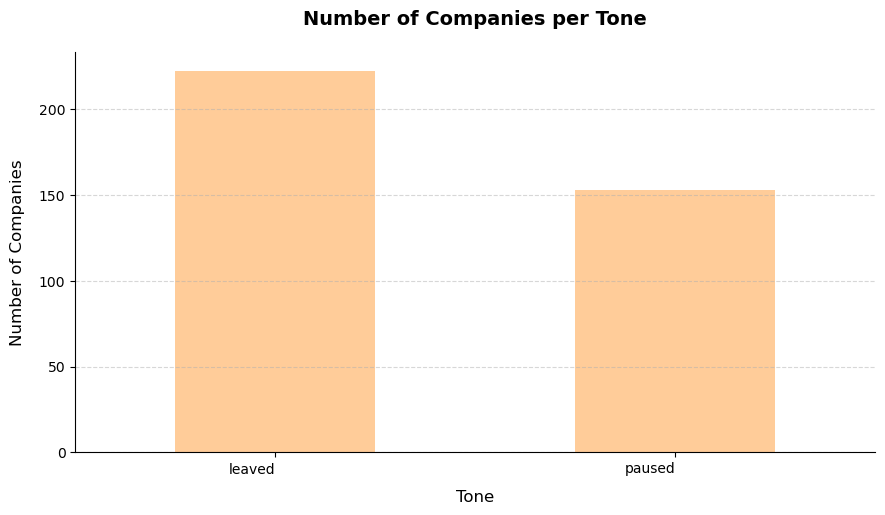

In [107]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_tone.plot(kind='bar', x='index', y='Tone', color='#ffcc99')

# Set the labels and title
plt.xlabel('Tone', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Tone', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=0, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [108]:
database3.head(1)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"EBBVI, OOO",Health Care,USA,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,197262600.0


In [109]:
database3.shape

(375, 12)

# Find the outliers

In [110]:
# # Calculate the IQR for Age, Mean Profit, and Mean Revenue columns
# cols_of_interest = ['Возраст компании, лет', 'Mean Profit', 'Mean Revenue']
# Q1 = database3[cols_of_interest].quantile(0.25)
# Q3 = database3[cols_of_interest].quantile(0.75)
# IQR = Q3 - Q1

# # Set the multiplier for outlier bounds (e.g., 1.5)
# multiplier = 1.5

# # Determine the lower and upper bounds for outliers
# lower_bound = Q1 - multiplier * IQR
# upper_bound = Q3 + multiplier * IQR

# # Identify outliers
# outliers = database3[(database3[cols_of_interest] < lower_bound) | (database3[cols_of_interest] > upper_bound)]
# # Print the outliers
# print(outliers)

In [111]:
# # Count the number of outliers
# num_outliers = ((database3[cols_of_interest] < lower_bound) | (database3[cols_of_interest] > upper_bound)).sum()
# # Print the number of outliers
# print("Number of outliers: \n", num_outliers)

# num_outliers = ((database3[cols_of_interest] < lower_bound) | (database3[cols_of_interest] > upper_bound)).sum().sum()
# print("Overall:", num_outliers)

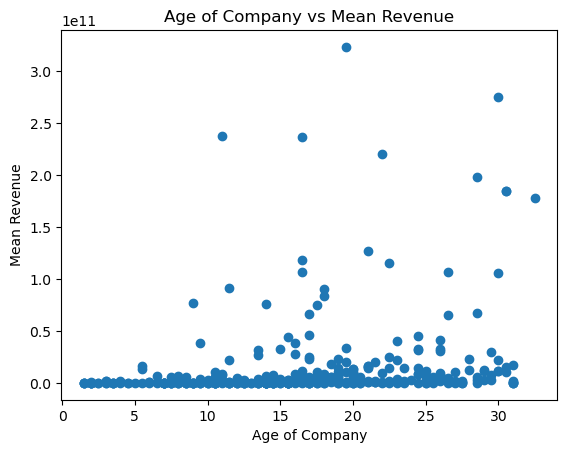

In [112]:
plt.scatter(database3['Возраст компании, лет'], database3['Mean Revenue'])
plt.title('Age of Company vs Mean Revenue')
plt.xlabel('Age of Company')
plt.ylabel('Mean Revenue')
plt.show()

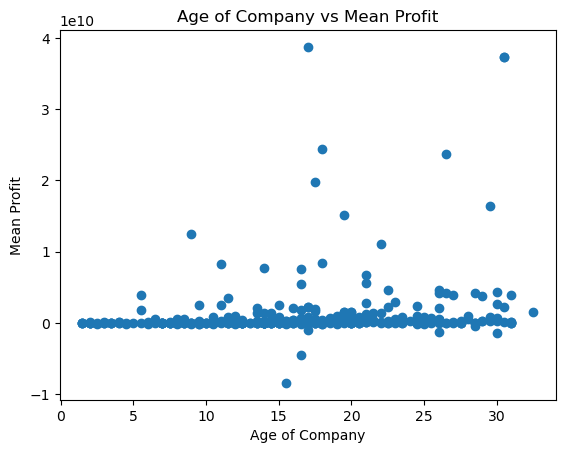

In [113]:
plt.scatter(database3['Возраст компании, лет'], database3['Mean Profit'])
plt.title('Age of Company vs Mean Profit')
plt.xlabel('Age of Company')
plt.ylabel('Mean Profit')

plt.show()

Here we see that Mean revenue and Mean Profit are highly positively correlated

Correlation Heatmap: This is a good place to look at correlations between the numeric variables in your dataset.

/var/folders/pk/czrcbd3n6tx7f3m676x_gw700000gn/T/ipykernel_52301/2896516649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(database3.corr(), annot=True)


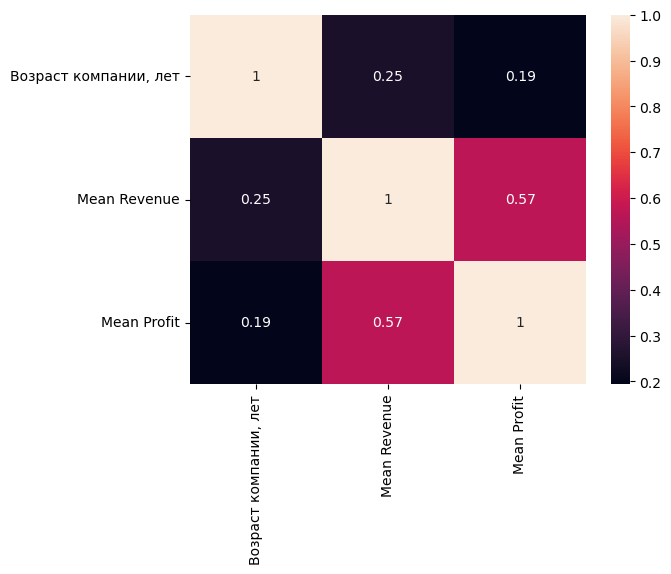

In [114]:
sns.heatmap(database3.corr(), annot=True)
plt.show()

Age of Company vs. Mean Revenue/Profit: It would be interesting to see whether older companies generally have higher revenue or profit. A scatter plot could be a good way to show this.

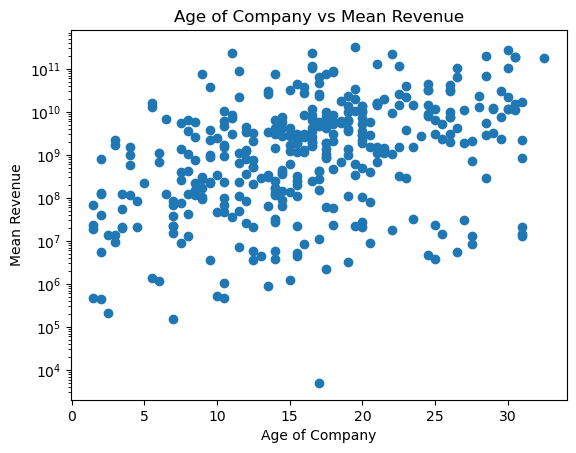

In [115]:
fig, ax = plt.subplots()

ax.scatter(database3['Возраст компании, лет'], database3['Mean Revenue'])
ax.set_yscale('log')  # If the values span several orders of magnitude
plt.title('Age of Company vs Mean Revenue')
plt.xlabel('Age of Company')
plt.ylabel('Mean Revenue')
plt.show()

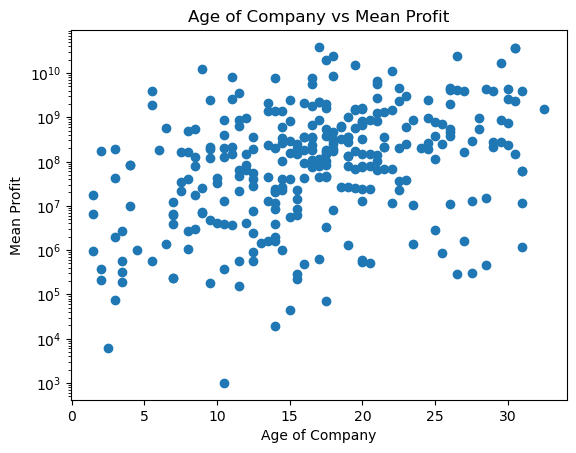

In [116]:
fig, ax = plt.subplots()

ax.scatter(database3['Возраст компании, лет'], database3['Mean Profit'])
ax.set_yscale('log')  # If the values span several orders of magnitude
plt.title('Age of Company vs Mean Profit')
plt.xlabel('Age of Company')
plt.ylabel('Mean Profit')
plt.show()

From the two graphs above we can conclude that age and Mean Revenue/Profit are slightly positevely correlated: the bigger the Age of company the bigger Mean Revenue/Profir is.

Tone and Profitability: Assuming "Tone" is a sentiment analysis metric, it would be interesting to see if there's a relationship between Tone and Mean Profit. You can use a boxplot to compare the distribution of Mean Profit between different tones.

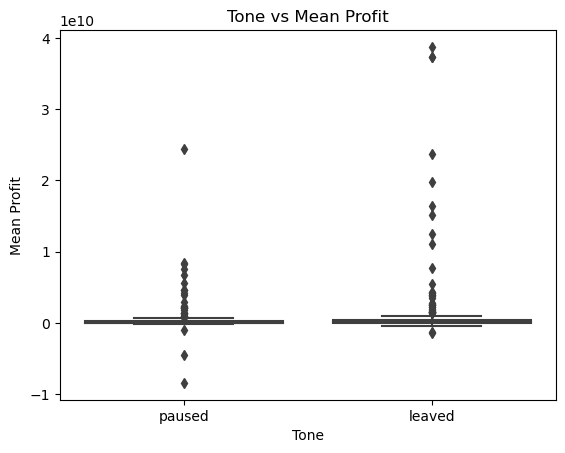

In [117]:
sns.boxplot(x='Tone', y='Mean Profit', data=database3)
plt.title('Tone vs Mean Profit')
plt.show()

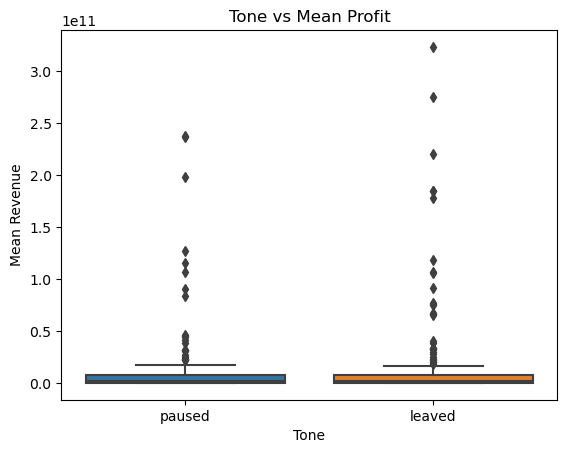

In [118]:
sns.boxplot(x='Tone', y='Mean Revenue', data=database3)
plt.title('Tone vs Mean Profit')
plt.show()

Form of Property and Profitability: Another potential factor influencing company performance might be its form of property. Again, you can use box plots to show the relationship between these two variables.

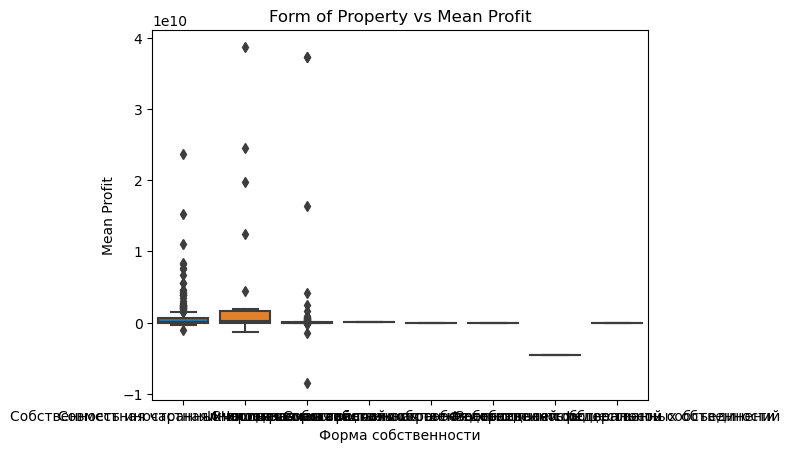

In [119]:
sns.boxplot(x='Форма собственности', y='Mean Profit', data=database3)
plt.title('Form of Property vs Mean Profit')
plt.show()


Size of Company and Mean Revenue/Profit: It would be interesting to investigate the relationship between the size of the company and its Mean Revenue/Profit. Given that 'Size of company' is ordinal, this would be a perfect opportunity to use a line plot to examine this.

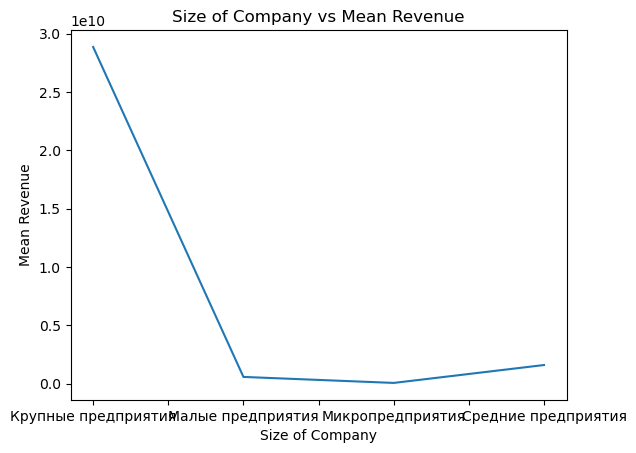

In [120]:
database3.groupby('Размер компании')['Mean Revenue'].mean().plot(kind='line')
plt.title('Size of Company vs Mean Revenue')
plt.xlabel('Size of Company')
plt.ylabel('Mean Revenue')
plt.show()

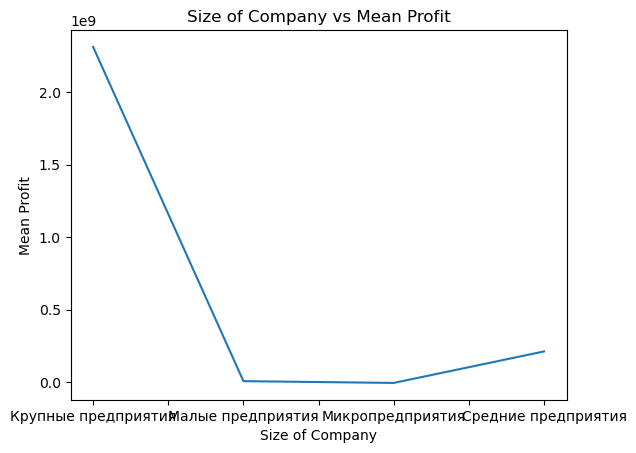

In [121]:
database3.groupby('Размер компании')['Mean Profit'].mean().plot(kind='line')
plt.title('Size of Company vs Mean Profit')
plt.xlabel('Size of Company')
plt.ylabel('Mean Profit')
plt.show()

# Prediction of Tone

In [122]:
df = database.copy()

In [123]:
df.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"EBBVI, OOO",Health Care,USA,"['suspend', 'aesthetics', 'operations', ',', '...",paused,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.031187e+10,1.972626e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",leaved,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.148731e+09,1.990225e+09
3,"FUDZHIFILM RUS, OOO",IT,Japan,"['suspended', 'some', 'shipments']",leaved,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.192020e+09,2.133112e+08
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.062124e+09,7.638600e+06
7,"MERCK LIFE SCIENCE, LLC",Health Care,USA,"['no', 'further', 'investments/clinical', 'tri...",leaved,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,1.059165e+09,1.801254e+08


In [124]:
df.columns

Index(['Company', 'Industry', 'Country', 'Action', 'Tone',
       'Возраст компании, лет', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', 'Mean Revenue', 'Mean Profit'],
      dtype='object')

### Before predicting, we should check whether variables "Mean Revenue", "Country" and "Industry" are somehow associated with "Tone"

In [125]:
from scipy.stats import chi2_contingency

### "Tone" and "Mean Revenue"

In [126]:
# Create a contingency table between "Tone" and "Mean Revenue"
contingency_table = pd.crosstab(df['Tone'], df['Mean Revenue'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 779.8415915915915
p-value: 0.43445813072068706


The p-value, 0.08029718074555114, represents the statistical significance of the association. In this case, the p-value is above the typical significance level of 0.05, suggesting that there is not enough evidence to reject the null hypothesis of independence. This means that based on the available data, <span style="font-size: 17px;">  we do not have significant evidence to conclude that there is an association between the "Tone" and "Mean Revenue" variables.

### "Tone" and "Country"

In [127]:
# Create a contingency table between "Tone" and "Country"
contingency_table = pd.crosstab(df['Tone'], df['Country'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 69.47037654940839
p-value: 0.3613928595131262


The p-value is extremely small (approximately 1.0227188469211595e-09), which is significantly below the typical significance level of 0.05. This indicates strong evidence to reject the null hypothesis of independence. Therefore, based on the available data, we can conclude that <span style="font-size: 17px;"> there is a significant association between the "Tone" and "Country" variables.

### "Tone" and "Industry"

In [128]:
# Create a contingency table between "Tone" and "Industry"
contingency_table = pd.crosstab(df['Tone'], df['Industry'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 34.7844734651167
p-value: 0.040800822002643525


The p-value is extremely small (approximately 4.815758757819452e-09), which is significantly below the typical significance level of 0.05. This provides strong evidence to reject the null hypothesis of independence. Therefore, based on the available data, we can conclude that <span style="font-size: 17px;">  there is a significant association between the "Tone" and "Industry" variables.

### "Tone" and "Age"

In [129]:
# Create a contingency table between "Tone" and "Industry"
contingency_table = pd.crosstab(df['Tone'], df['Возраст компании, лет'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 125.29530233358359
p-value: 0.35204598642281804


<span style="font-size: 17px;"> no dependence

### "Tone" and "Форма собственности"

In [130]:
# Create a contingency table between "Tone" and "Industry"
contingency_table = pd.crosstab(df['Tone'], df['Форма собственности'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 16.65387057883655
p-value: 0.27509268390110353


<span style="font-size: 17px;"> no dependence

### Therefore, we can predict Tone only by Country and by Industry

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [132]:
# Split the dataset into input features and target variable
X = df[['Country', 'Industry']]  # Input features
y = df['Tone']                   # Target variable

In [133]:
# Choose a machine learning algorithm and define the preprocessing steps
model = DecisionTreeClassifier()

In [134]:
# One-hot encoding for categorical variables
categorical_features = ['Country', 'Industry']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)])

In [135]:
# Combine preprocessing and model into a single pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [136]:
# Train the model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Country', 'Industry'])])),
                ('model', DecisionTreeClassifier())])

In [137]:
# Predict the tone for new companies
new_companies = pd.DataFrame({'Country': ['Spain', 'France'],
                              'Industry': ['IT', 'IT']})
predictions = model.predict(new_companies)

# Print the predicted tones for the new companies
print(predictions)

['leaved' 'leaved']


In [138]:
import configlib as lib
lib.save_new_df(spark_int_no_nans, database)

ModuleNotFoundError: No module named 'configlib'

In [ ]:
$ ssh-keygen -t ed25519 -C "lyakhova135@gmail.com"